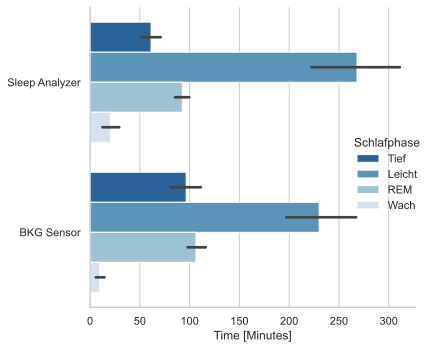

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
%config InlineBackend.figure_format = 'svg'
df0 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=0, usecols=["Beschreibung","Tief","Leicht","REM","Wach"])
df1 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=0, usecols=["Beschreibung","Tief %","Leicht %","REM %","Wach %"])
df1.rename(columns = {'Tief %':'Tief', 'Leicht %':'Leicht',"REM %":"REM","Wach %":"Wach"}, inplace = True)
df2 = pd.read_excel("Evaluation_Data\Evaluation.xlsx", sheet_name=1)
df0_melted = pd.melt(df0, id_vars=["Beschreibung"], value_vars=df1[["Tief","Leicht","REM","Wach"]], var_name="Schlafphase", value_name="Dauer [hh:mm]")
df0_melted["tc"]=pd.to_datetime(df0_melted["Dauer [hh:mm]"], format="%H:%M:%S")
df0_melted["Dauer [hh:mm]"]=pd.to_datetime(df0_melted["Dauer [hh:mm]"], format="%H:%M:%S")
timecodes = pd.DatetimeIndex(df0_melted["tc"])
df0_melted["tc"] = timecodes.hour * 60 + timecodes.minute
df1_melted = pd.melt(df1, id_vars=["Beschreibung"], value_vars=df1[["Tief","Leicht","REM","Wach"]], var_name="Schlafphase", value_name="Anteil an der Gesamtdauer [%]")
df1_melted["Anteil an der Gesamtdauer [%]"] = 100*df1_melted["Anteil an der Gesamtdauer [%]"]
df2_melted = pd.melt(df2, id_vars=["Parameter"], value_vars=df2[["Accuracy","Precision","F1-Score"]], var_name="Metrik", value_name="Score")
sns.set(rc={'figure.figsize':(7,2)})
sns.set_style("whitegrid")
ax0 = sns.catplot(y="Beschreibung", x="tc", hue="Schlafphase", data=df0_melted, palette="Blues_r", kind="bar")
ax0.set_axis_labels("Time [Minutes]", "")
plt.tight_layout()

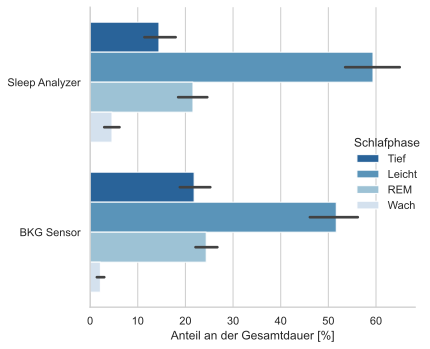

In [9]:
ax1 = sns.catplot(y="Beschreibung", x="Anteil an der Gesamtdauer [%]", hue="Schlafphase", data=df1_melted, palette="Blues_r", kind="bar").set(ylabel=None)
plt.tight_layout()

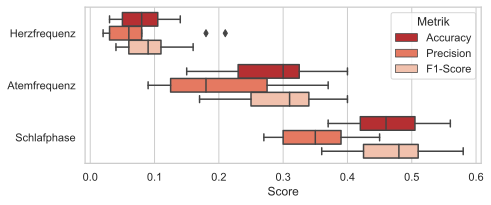

In [10]:
ax2 = sns.boxplot(data=df2_melted, y="Parameter", x="Score", hue="Metrik", palette="Reds_r").set(ylabel=None)
plt.tight_layout()